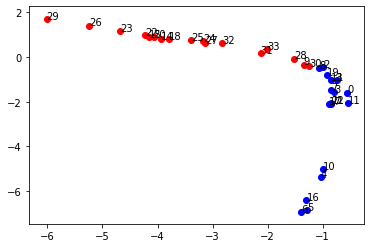

In [1]:
# embedding of Zachary's karate club network
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
from gensim.models import Word2Vec as word2vec

def make_random_walks(G, num_of_walk, length_of_walk):
  walks = list()
  for i in range(num_of_walk):
    node_list = list(G.nodes())
    for node in node_list:
      current_node = node
      walk = list()
      walk.append(str(node))
      for j in range(length_of_walk):
        next_node = random.choice(list(G.neighbors(current_node)))
        walk.append(str(next_node))
        current_node = node
      walks.append(walk)
  return walks

G = nx.karate_club_graph()
walks = make_random_walks(G, 100, 20)
model = word2vec(walks, min_count=0, size=2, window=5, workers=1)

x = list()
y = list()
node_list = list()
colors = list()
fig, ax = plt.subplots()
for node in G.nodes():
  vector = model.wv[str(node)]
  x.append(vector[0])
  y.append(vector[1])
  ax.annotate(str(node), (vector[0], vector[1]))
  if G.nodes[node]["club"] == "Officer":
    colors.append("r")
  else:
    colors.append("b")
for i in range(len(x)):
  ax.scatter(x[i], y[i], c=colors[i])
plt.show()

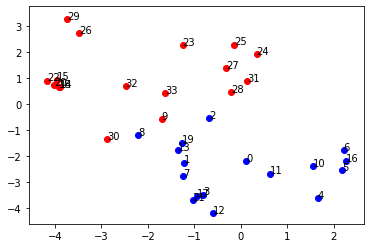

In [2]:
model3 = word2vec(walks, min_count=0, size=3, window=5, workers=1)

x3 = list()
y3 = list()
node_list3 = list()
colors3 = list()
fig3, ax3 = plt.subplots()
for node in G.nodes():
  vector3 = model3.wv[str(node)]
  x3.append(vector3[0])
  y3.append(vector3[1])
  ax3.annotate(str(node), (vector3[0], vector3[1]))
  if G.nodes[node]["club"] == "Officer":
    colors3.append("r")
  else:
    colors3.append("b")
for i in range(len(x3)):
  ax3.scatter(x3[i], y3[i], c=colors3[i])
plt.show()

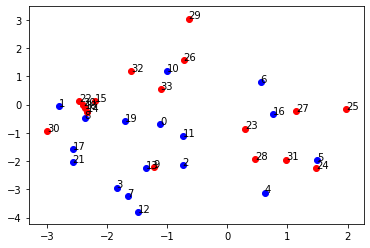

In [3]:
model4 = word2vec(walks, min_count=0, size=4, window=5, workers=1)

x4 = list()
y4 = list()
node_list4 = list()
colors4 = list()
fig4, ax4 = plt.subplots()
for node in G.nodes():
  vector4 = model4.wv[str(node)]
  x4.append(vector4[0])
  y4.append(vector4[1])
  ax4.annotate(str(node), (vector4[0], vector4[1]))
  if G.nodes[node]["club"] == "Officer":
    colors4.append("r")
  else:
    colors4.append("b")
for i in range(len(x4)):
  ax4.scatter(x4[i], y4[i], c=colors4[i])
plt.show()

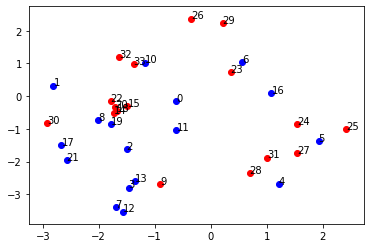

In [4]:
model5 = word2vec(walks, min_count=0, size=5, window=5, workers=1)

x5 = list()
y5 = list()
node_list5 = list()
colors5 = list()
fig5, ax5 = plt.subplots()
for node in G.nodes():
  vector5 = model5.wv[str(node)]
  x5.append(vector5[0])
  y5.append(vector5[1])
  ax5.annotate(str(node), (vector5[0], vector5[1]))
  if G.nodes[node]["club"] == "Officer":
    colors5.append("r")
  else:
    colors5.append("b")
for i in range(len(x5)):
  ax5.scatter(x5[i], y5[i], c=colors5[i])
plt.show()

**Ultimately, we see that model size=2 gives the best defined pattern**

In [0]:
vectors = []

for node in G.nodes():
  vectors.append(model.wv[str(node)])
  
result = {}
total_count = nx.number_of_nodes(G)
for m in range(total_count):
  for n in range(m+1, total_count):
    if G.has_edge(m, n) == False:
      result[(m, n)] = np.linalg.norm(vectors[m]-vectors[n])

**Prediction Top 5**

In [8]:
pd.DataFrame(result.items(), columns=["Pairs", "Predict"]).sort_values(by="Predict", ascending=False).head(5)

,Pairs,Predict
138,"(5, 29)",9.787454
164,"(6, 29)",9.786609
370,"(16, 29)",9.377042
161,"(6, 26)",9.187716
135,"(5, 26)",9.181348
